In [165]:
import jax
import jax.numpy as jnp
import numpy as np
from jax.scipy.signal import convolve2d

from matplotlib import pyplot as plt
from skimage.io import imread, imsave
from skimage.util import (img_as_float32, img_as_ubyte, random_noise)

In [166]:
img = imread("The_Cat.jpg")

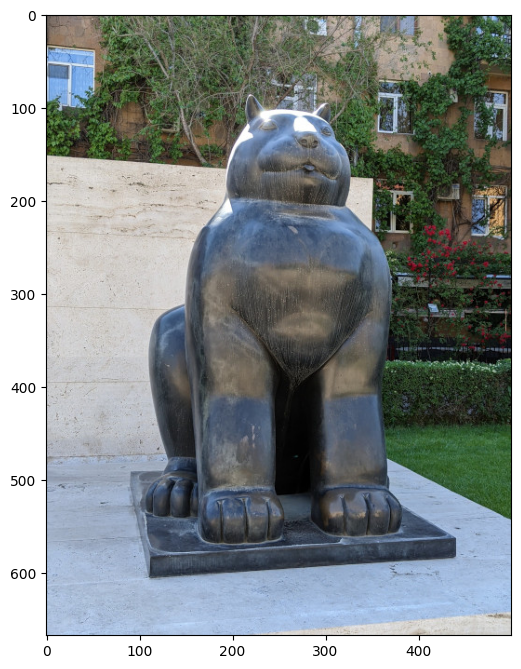

In [167]:
plt.figure(figsize=(6, 10)) # figsize values are in inches
plt.imshow(img)

In [168]:
img.ndim, img.shape

(3, (667, 500, 3))

In [169]:
cat_face = img[80:220, 190:330, 1]
cat_face.shape


(140, 140)

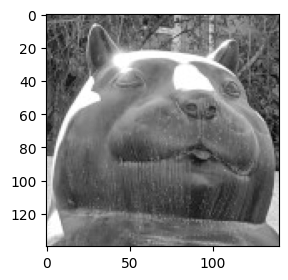

In [170]:
plt.figure(figsize=(3,4))
plt.imshow(cat_face, cmap='gray')

In [171]:
## FLIP IMAGE HORIZONTALLY
flip_horizontal = cat_face[:, ::-1]


## FLIP VERTICALLY
flip_vertical = cat_face[::-1, :]


## ROTATE 90 clock wise

rot_90 = np.rot90(cat_face, k=1, axes=(0,1))

## ROTATE 370 clock wise

rot_370 = np.rot90(cat_face, k=3, axes=(0,1))


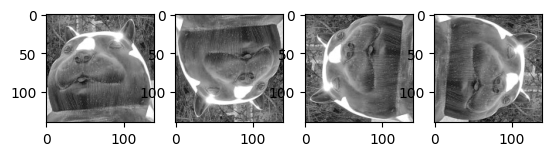

In [172]:
## DISPLAY TRANSFORMATIONS

fig, ax = plt.subplots(1, 4)
ax[0].imshow(flip_horizontal, cmap='gray')
ax[1].imshow(flip_vertical, cmap='gray')
ax[2].imshow(rot_90, cmap='gray')
ax[3].imshow(rot_370, cmap='gray')
plt.show()

In [173]:
img.dtype

dtype('uint8')

In [174]:
img = img_as_float32(img)
img.dtype

dtype('float32')

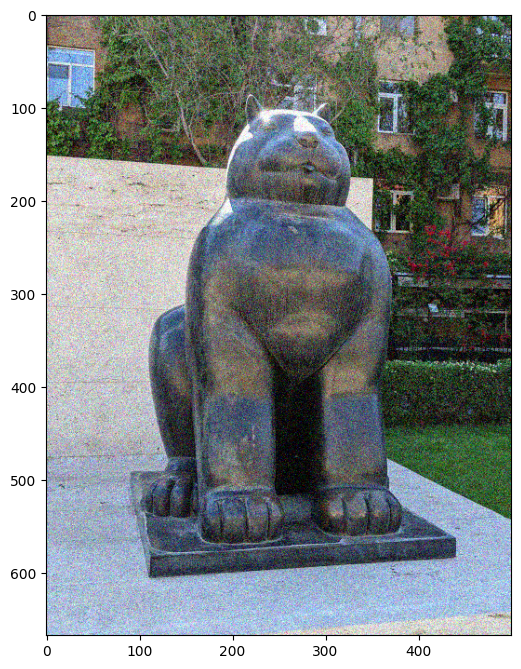

In [175]:
## ADD NOISE TO ORIGINAL IMAGE

img_noised = random_noise(img, mode='gaussian')

plt.figure(figsize=(6, 10))
plt.imshow(img_noised)

In [176]:
kernel_blur = np.ones((5, 5))
kernel_blur /= np.sum(kernel_blur)

kernel_blur

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

In [177]:
def gaussian_kernel(kernel_size, sigma=1.0, mu=0.0):
    center = kernel_size // 2
    x, y = np.mgrid[-center:kernel_size, -center:kernel_size-center]
    d = np.sqrt(np.square(x) + np.square(y))
    koeff = 1 /(2 * np.pi * np.square(sigma))
    kernel = koeff * np.exp(-np.square(d - mu) / 2 * np.square(sigma))
    return kernel

kernel_gauss = gaussian_kernel(5)
kernel_gauss

array([[2.91502447e-03, 1.30642333e-02, 2.15392793e-02, 1.30642333e-02,
        2.91502447e-03],
       [1.30642333e-02, 5.85498315e-02, 9.65323526e-02, 5.85498315e-02,
        1.30642333e-02],
       [2.15392793e-02, 9.65323526e-02, 1.59154943e-01, 9.65323526e-02,
        2.15392793e-02],
       [1.30642333e-02, 5.85498315e-02, 9.65323526e-02, 5.85498315e-02,
        1.30642333e-02],
       [2.91502447e-03, 1.30642333e-02, 2.15392793e-02, 1.30642333e-02,
        2.91502447e-03],
       [2.39279779e-04, 1.07237757e-03, 1.76805171e-03, 1.07237757e-03,
        2.39279779e-04],
       [7.22562324e-06, 3.23829967e-05, 5.33905355e-05, 3.23829967e-05,
        7.22562324e-06]])

In [178]:
img.shape # last dimension is the color channel

(667, 500, 3)

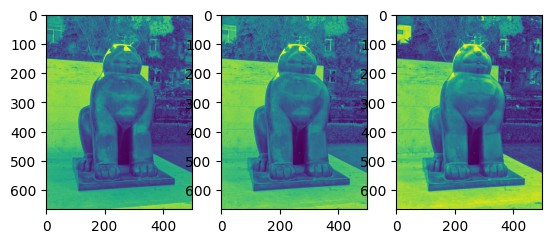

In [179]:
## DEPICT EACH COLOR CHANNEL 

fig, ax = plt.subplots(1,3)

ax[0].imshow(img[:, :, 0])
ax[1].imshow(img[:, :, 1])
ax[2].imshow(img[:, :, 2])
plt.show()

In [180]:
def color_convolution(image, kernel):
    channels = []

    for i in range(3):
        color_channel = image[:, :, i] # fetch image in each color channel
        filtered_channel = convolve2d(
            color_channel, kernel, mode="same"
        )
        filtered_channel = np.clip(filtered_channel, 0, 1)

        channels.append(filtered_channel)
    final_image = np.stack(channels, axis=2)
    return final_image

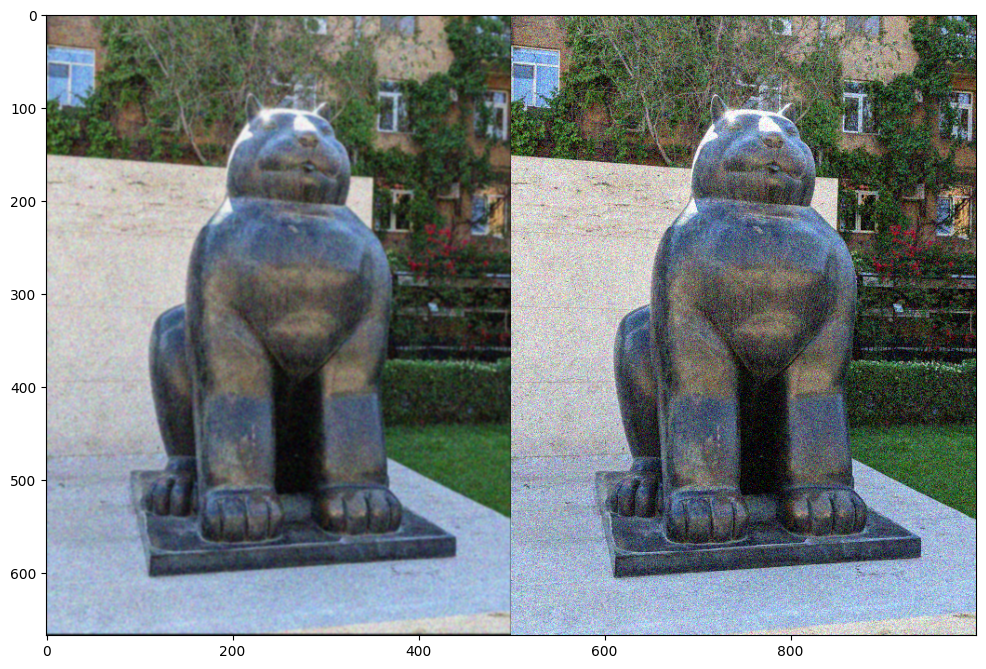

In [181]:
img_blur = color_convolution(img_noised, kernel_gauss)
plt.figure(figsize=(12, 10))
plt.imshow(np.hstack((img_blur, img_noised)))

In [182]:
kernel_sharpen = np.array([[ -1,  -1, -1,  -1,  -1],
                           [ -1, -1, -1, -1,  -1],
                           [ -1, -1, 50, -1, -1],
                           [ -1, -1, -1, -1,  -1],
                           [ -1, -1, -1,  -1,  -1]], dtype=np.float32)

## NORMALIZE
kernel_sharpen /= np.sum(kernel_sharpen)
kernel_sharpen

array([[-0.03846154, -0.03846154, -0.03846154, -0.03846154, -0.03846154],
       [-0.03846154, -0.03846154, -0.03846154, -0.03846154, -0.03846154],
       [-0.03846154, -0.03846154,  1.9230769 , -0.03846154, -0.03846154],
       [-0.03846154, -0.03846154, -0.03846154, -0.03846154, -0.03846154],
       [-0.03846154, -0.03846154, -0.03846154, -0.03846154, -0.03846154]],
      dtype=float32)

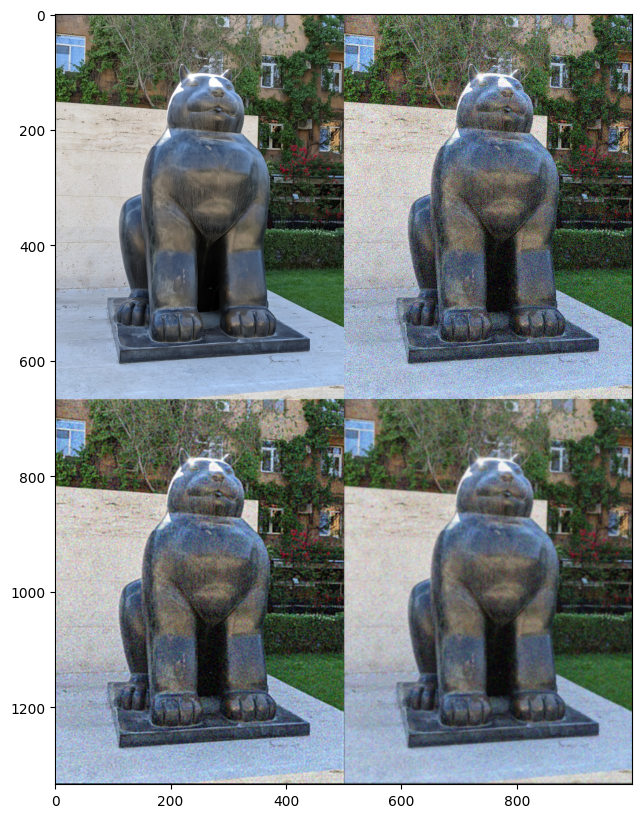

In [183]:
img_restored = color_convolution(img_blur, kernel_sharpen)

plt.figure(figsize=(12, 10))
plt.imshow(np.vstack((np.hstack((img, img_noised)),
                     np.hstack((img_restored, img_blur)))))

In [184]:
## PREPARE TO SAVE

image_modified = img_as_ubyte(img_restored)

imsave('The_cat_modified.jpg', arr=image_modified) # imsave from skicit

In [185]:
jnp.sum(jnp.array([1, 2, 3]))

Array(6, dtype=int64)

In [186]:
jax.local_devices()

[CudaDevice(id=0)]

In [187]:
jax.devices()

[CudaDevice(id=0)]

In [188]:
jax.local_devices(backend='cpu')

[CpuDevice(id=0)]

In [189]:
jax.devices('cpu')

[CpuDevice(id=0)]

In [190]:
arr = jnp.array([1 , 42, 31337])
arr.device

CudaDevice(id=0)

In [191]:
jax.default_device()

In [192]:
arr_cpu = jax.device_put(arr, jax.devices('cpu')[0])
arr_cpu.device

CpuDevice(id=0)

In [193]:
arr_host = jax.device_get(arr)

type(arr_host)



numpy.ndarray

In [194]:
## TIMING AND ASYNCHRONOUS DISPATCH

a = jnp.array(range(1000000)).reshape((1000, 1000))
a.device

CudaDevice(id=0)

In [195]:
%time x = jnp.dot(a,a)

CPU times: user 352 μs, sys: 0 ns, total: 352 μs
Wall time: 256 μs


In [196]:
%time x = jnp.dot(a,a).block_until_ready()

CPU times: user 1.32 ms, sys: 147 μs, total: 1.47 ms
Wall time: 3.54 ms


In [197]:
a_cpu = jax.device_put(a, jax.devices('cpu')[0])
a_cpu.device

CpuDevice(id=0)

In [198]:
%time x = jnp.dot(a_cpu,a_cpu).block_until_ready()

CPU times: user 561 ms, sys: 0 ns, total: 561 ms
Wall time: 557 ms


In [199]:
a_jnp = jnp.array(range(10))
a_jnp

Array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [200]:
a_jnp = a_jnp.at[7].set(100)

a_jnp

Array([  0,   1,   2,   3,   4,   5,   6, 100,   8,   9], dtype=int64)

In [201]:
a_jnp = jnp.array(range(10))
a_jnp

Array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [202]:
a_jnp.at[42].get(mode='drop')

Array(-9223372036854775808, dtype=int64)

In [203]:
a_jnp.at[42].get(mode='fill', fill_value=-1)

Array(-1, dtype=int64)

In [204]:
## TO SETUP FLOAT64

from jax import config
config.update("jax_enable_x64", True)


In [205]:
x = jnp.array(range(10), dtype=jnp.float64)
x.dtype

dtype('float64')

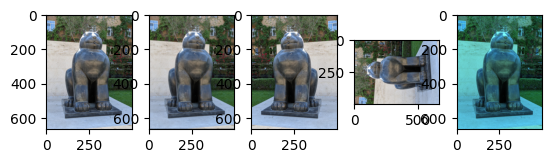

In [210]:
## TEXT BOOK EXERCISE ##

add_noise_func = lambda img: color_convolution(img, gaussian_kernel(5))

horizontal_flip_func = lambda img: img[:,::-1,:]

rotate_func = lambda img: jnp.rot90(img)

adjust_colors_func = lambda img: jnp.stack((img[:, :, 0] * 0.5, img[:, :, 1], img[:, :, 2]), axis=2) ## scale down 1 color channel



## TEST FUNCTIONS ##

fig, ax = plt.subplots(1, 5)
ax[0].imshow(img)
ax[1].imshow(add_noise_func(img))
ax[2].imshow(horizontal_flip_func(img))
ax[3].imshow(rotate_func(img))
ax[4].imshow(adjust_colors_func(img))
plt.show()

In [211]:
from jax import random

def random_augmentation(image, augmentations, rng_key):
    augmentation_index = random.randint(key=rng_key, minval=0, maxval=len(augmentations), shape=())
    augmented_image = jax.lax.switch(augmentation_index, augmentations, image)
    return augmented_image

In [217]:
augmentations= [
    add_noise_func,
    horizontal_flip_func,
    rotate_func,
    adjust_colors_func
]

new_image = random_augmentation(img, augmentations, random.PRNGKey(42))

new_image.shape

AttributeError: 'NoneType' object has no attribute 'shape'